# IMPORTACIÓN DE LIBRERÍAS

Importamos las librerias necesarias para comenzar a trabajar con los datos

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost

In [6]:
pip install keras

In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
import joblib
from sklearn import tree
from sklearn.tree import export_text
from xgboost import XGBClassifier
from subprocess import check_call
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import export_text
from xgboost import XGBClassifier
from subprocess import check_call
from IPython.display import Image as PImage

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import metrics

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# IMPORTACIÓN DE LOS SETS DE DATOS

Importamos la compilación de sets de datos a utilizar y vemos sus primeros registros

In [3]:
import pandas as pd

# Especifica la ruta del archivo CSV
file_path = 'D:/Tesis/Definitivos/nuevo/df_mora_prestamos2.csv'

# Cargar el CSV en un DataFrame
df_mora_prestamos = pd.read_csv(file_path)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1454, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1345, in structured_traceback
    return VerboseTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1192, in structured_traceback
    formatted_exception = self.format_exception_as_a_whole(etype, evalue, etb, number_of_lines_of_context,
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\User

In [85]:
import pandas as pd

# Supongamos que df_mora_prestamos es tu DataFrame
# Si no has cargado el DataFrame, puedes hacerlo de la siguiente manera:
# df_mora_prestamos = pd.read_csv('tu_archivo.csv')

# Contar la cantidad de registros y variables
num_registros = df_mora_prestamos.shape[0]  # Número de filas
num_variables = df_mora_prestamos.shape[1]  # Número de columnas

# Imprimir los resultados
print(f"Cantidad de registros: {num_registros}")
print(f"Cantidad de variables: {num_variables}")

Cantidad de registros: 1622022
Cantidad de variables: 35


# 3. ANALISIS DE CARACTERISTICA POR TIPO DE TASA

Analisis de el tipo de tasas que tenia el conjunto de datos:
- Tasa Fija = 0
- Tasa Mixta = 1
- Sin Interes (A tasa cero) = 2
- Tasa Variable = 3

In [89]:
print(df_mora_prestamos['Tasa_PrestamosPersonales'].value_counts())

Tasa_PrestamosPersonales
0    1018274
1     382232
3     216459
2       5057
Name: count, dtype: int64


## Partición del conjunto de datos

Separar del conjunto de datos los registros de tasa variable

In [95]:
import pandas as pd


# Filtrar solo los registros con Tasa_PrestamosPersonales = 3
df_tasavariable = df_mora_prestamos[df_mora_prestamos['Tasa_PrestamosPersonales'] == 3]

# Guardar el nuevo dataset filtrado
df_tasavariable.to_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_filtrado.csv', index=False)

# Mostrar información del filtrado
print(f"Registros originales: {len(df_mora_prestamos)}")
print(f"Registros filtrados: {len(df_tasavariable)}")
print(f"\nPorcentaje de registros mantenidos: {(len(df_tasavariable)/len(df_mora_prestamos))*100:.2f}%")

Registros originales: 1622022
Registros filtrados: 216459

Porcentaje de registros mantenidos: 13.35%


Separar del conjunto de datos los registros de tasa Fija

In [97]:
import pandas as pd


# Filtrar solo los registros con Tasa_PrestamosPersonales = 3
df_tasafija = df_mora_prestamos[df_mora_prestamos['Tasa_PrestamosPersonales'] == 0]

# Guardar el nuevo dataset filtrado
df_tasafija.to_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_tasafija.csv', index=False)

# Mostrar información del filtrado
print(f"Registros originales: {len(df_mora_prestamos)}")
print(f"Registros filtrados: {len(df_tasafija)}")
print(f"\nPorcentaje de registros mantenidos: {(len(df_tasafija)/len(df_mora_prestamos))*100:.2f}%")

Registros originales: 1622022
Registros filtrados: 1018274

Porcentaje de registros mantenidos: 62.78%


## Distribución de los registros (Morosos y no Morosos) por tipo de tasa

Distribución de la Morosidad en los registros con tasa variable

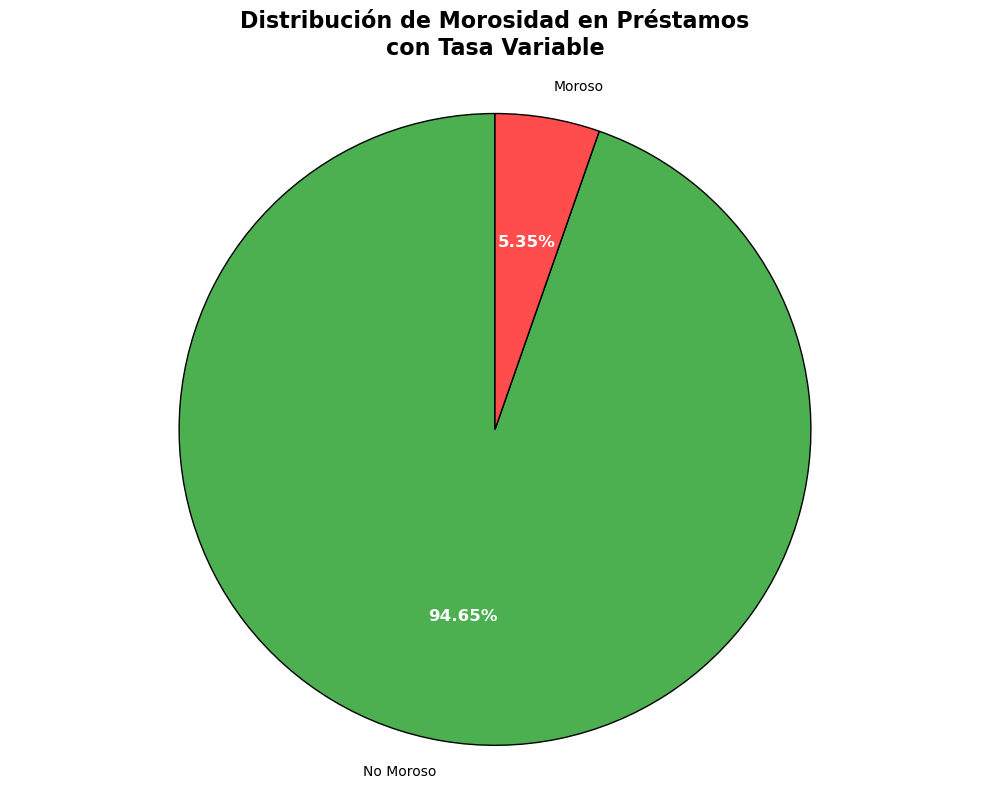


Estadísticas:
Total de préstamos: 216459
No Morosos: 204877 (94.65%)
Morosos: 11582 (5.35%)


In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset filtrado
df_tasavariable = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_filtrado.csv')

# Calcular el conteo de morosidad
conteo_morosidad = df_tasavariable['Morosidad'].value_counts()
valores = conteo_morosidad.values
etiquetas = ['No Moroso' if i == 0 else 'Moroso' for i in conteo_morosidad.index]

# Asignar colores: Rojo para "Moroso" y Verde para "No Moroso"
colores = ['#4CAF50', '#FF4C4C']

# Crear el gráfico de torta
fig, ax = plt.subplots(figsize=(10, 8))
autotexts = plt.pie(valores, 
                    labels=etiquetas, 
                    autopct='%.2f%%', 
                    colors=colores, 
                    startangle=90, 
                    wedgeprops={'edgecolor': 'black'})

# Ajustar propiedades de las etiquetas dentro del gráfico
for autotext in autotexts[2]:  
    autotext.set_color('white')  
    autotext.set_fontsize(12)  
    autotext.set_fontweight('bold')  

# Añadir título
plt.title("Distribución de Morosidad en Préstamos\ncon Tasa Variable", 
          fontsize=16, 
          fontweight='bold', 
          pad=20)

plt.axis('equal')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Imprimir estadísticas
total = len(df_tasavariable)
morosos = conteo_morosidad[1] if 1 in conteo_morosidad else 0
no_morosos = conteo_morosidad[0] if 0 in conteo_morosidad else 0

print("\nEstadísticas:")
print(f"Total de préstamos: {total}")
print(f"No Morosos: {no_morosos} ({(no_morosos/total)*100:.2f}%)")
print(f"Morosos: {morosos} ({(morosos/total)*100:.2f}%)")

Distribución de la Morosidad en los registros con tasa Fija

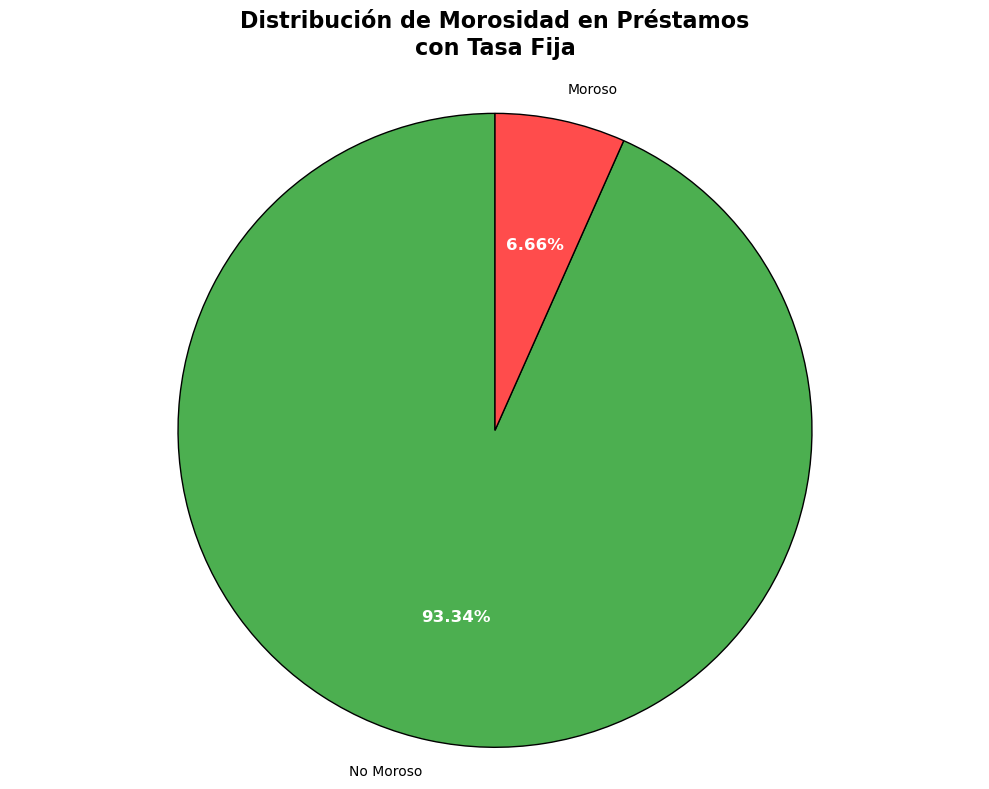


Estadísticas:
Total de préstamos: 1018274
No Morosos: 950507 (93.34%)
Morosos: 67767 (6.66%)


In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset filtrado
df_tasafija = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_tasafija.csv')

# Calcular el conteo de morosidad
conteo_morosidad = df_tasafija['Morosidad'].value_counts()
valores = conteo_morosidad.values
etiquetas = ['No Moroso' if i == 0 else 'Moroso' for i in conteo_morosidad.index]

# Asignar colores: Rojo para "Moroso" y Verde para "No Moroso"
colores = ['#4CAF50', '#FF4C4C']

# Crear el gráfico de torta
fig, ax = plt.subplots(figsize=(10, 8))
autotexts = plt.pie(valores, 
                    labels=etiquetas, 
                    autopct='%.2f%%', 
                    colors=colores, 
                    startangle=90, 
                    wedgeprops={'edgecolor': 'black'})

# Ajustar propiedades de las etiquetas dentro del gráfico
for autotext in autotexts[2]:  
    autotext.set_color('white')  
    autotext.set_fontsize(12)  
    autotext.set_fontweight('bold')  

# Añadir título
plt.title("Distribución de Morosidad en Préstamos\ncon Tasa Fija", 
          fontsize=16, 
          fontweight='bold', 
          pad=20)

plt.axis('equal')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Imprimir estadísticas
total = len(df_tasafija)
morosos = conteo_morosidad[1] if 1 in conteo_morosidad else 0
no_morosos = conteo_morosidad[0] if 0 in conteo_morosidad else 0

print("\nEstadísticas:")
print(f"Total de préstamos: {total}")
print(f"No Morosos: {no_morosos} ({(no_morosos/total)*100:.2f}%)")
print(f"Morosos: {morosos} ({(morosos/total)*100:.2f}%)")

## Busqueda de los mejores hiperparametros aplicando LightGBM

Modelo LightGBM solo conjunto de datos de tasa variable

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Cargar dataset
df_tasavariable = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_filtrado.csv')

# Separar características y variable objetivo
X = df_tasavariable.drop('Morosidad', axis=1)
y = df_tasavariable['Morosidad']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Definir el espacio de búsqueda de hiperparámetros
param_distributions = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 3, 5, 7, 9],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [5, 10, 20, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Configurar el modelo base
model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    random_state=42,
    verbose=-1
)

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Realizar la búsqueda
print("Iniciando búsqueda de hiperparámetros...")
random_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y score
print("\nMejores parámetros encontrados:")
for param, value in random_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nMejor score (ROC-AUC): {random_search.best_score_:.4f}")

# Entrenar el modelo con los mejores parámetros
best_model = lgb.LGBMClassifier(**random_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular métricas
print("\nMétricas en conjunto de prueba:")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Guardar los mejores parámetros
pd.DataFrame([random_search.best_params_]).to_csv('mejores_parametros_lightgbm_tv.csv', index=False)

Iniciando búsqueda de hiperparámetros...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Mejores parámetros encontrados:
subsample: 0.8
reg_lambda: 0.5
reg_alpha: 0.1
num_leaves: 63
n_estimators: 500
min_child_samples: 5
max_depth: 7
learning_rate: 0.05
colsample_bytree: 0.8

Mejor score (ROC-AUC): 0.9994

Métricas en conjunto de prueba:
ROC-AUC: 0.9993
Precision: 0.9844
Recall: 0.9632
F1-Score: 0.9737
Accuracy: 0.9972


Modelo LightGBM solo conjunto de datos de tasa Fija

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Cargar dataset
df_tasafija = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_tasafija.csv')

# Separar características y variable objetivo
X = df_tasafija.drop('Morosidad', axis=1)
y = df_tasafija['Morosidad']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Definir el espacio de búsqueda de hiperparámetros
param_distributions = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 3, 5, 7, 9],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [5, 10, 20, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Configurar el modelo base
model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    random_state=42,
    verbose=-1
)

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Realizar la búsqueda
print("Iniciando búsqueda de hiperparámetros...")
random_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y score
print("\nMejores parámetros encontrados:")
for param, value in random_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nMejor score (ROC-AUC): {random_search.best_score_:.4f}")

# Entrenar el modelo con los mejores parámetros
best_model = lgb.LGBMClassifier(**random_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular métricas
print("\nMétricas en conjunto de prueba:")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Guardar los mejores parámetros
pd.DataFrame([random_search.best_params_]).to_csv('mejores_parametros_lightgbm_tf.csv', index=False)

Iniciando búsqueda de hiperparámetros...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Mejores parámetros encontrados:
subsample: 1.0
reg_lambda: 0.1
reg_alpha: 0.1
num_leaves: 127
n_estimators: 500
min_child_samples: 50
max_depth: -1
learning_rate: 0.05
colsample_bytree: 0.6

Mejor score (ROC-AUC): 0.9998

Métricas en conjunto de prueba:
ROC-AUC: 0.9999
Precision: 0.9933
Recall: 0.9832
F1-Score: 0.9882
Accuracy: 0.9984


## Control Cruzado con aplicando de los mejores hiperparametros al modelo LightGBM

Cross Validation de los mejores hiperparametros de LightGBM - Tasa Variable

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Cargar datos
df_tasavariable = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_filtrado.csv')
X = df_tasavariable.drop('Morosidad', axis=1)
y = df_tasavariable['Morosidad']

# Configurar los mejores hiperparámetros
best_params = {
    'subsample': 0.8,
    'reg_lambda': 0.5,
    'reg_alpha': 0.1,
    'num_leaves': 63,
    'n_estimators': 500,
    'min_child_samples': 5,
    'max_depth': 7,
    'learning_rate': 0.05,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Configurar la validación cruzada
n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para almacenar resultados
cv_scores = {
    'roc_auc': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'accuracy': []
}

# Realizar validación cruzada
print(f"Iniciando validación cruzada con {n_splits} folds...")

for fold, (train_idx, val_idx) in enumerate(cv.split(X), 1):
    print(f"\nFold {fold}/{n_splits}")
    
    # Dividir datos
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Entrenar modelo
    model = lgb.LGBMClassifier(**best_params)
    model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Calcular métricas
    cv_scores['roc_auc'].append(roc_auc_score(y_val, y_pred_proba))
    cv_scores['precision'].append(precision_score(y_val, y_pred))
    cv_scores['recall'].append(recall_score(y_val, y_pred))
    cv_scores['f1'].append(f1_score(y_val, y_pred))
    cv_scores['accuracy'].append(accuracy_score(y_val, y_pred))
    
    # Imprimir métricas del fold actual
    print(f"\nMétricas del Fold {fold}:")
    print(f"ROC-AUC: {cv_scores['roc_auc'][-1]:.4f}")
    print(f"Precision: {cv_scores['precision'][-1]:.4f}")
    print(f"Recall: {cv_scores['recall'][-1]:.4f}")
    print(f"F1-Score: {cv_scores['f1'][-1]:.4f}")
    print(f"Accuracy: {cv_scores['accuracy'][-1]:.4f}")

# Calcular estadísticas de las métricas
cv_stats = {}
for metric in cv_scores:
    cv_stats[metric] = {
        'mean': np.mean(cv_scores[metric]),
        'std': np.std(cv_scores[metric]),
        'min': np.min(cv_scores[metric]),
        'max': np.max(cv_scores[metric])
    }

# Crear directorio para resultados
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
result_dir = f'D:/Tesis/Definitivos/nuevo/lightgbm_cv_results_{timestamp}'
os.makedirs(result_dir, exist_ok=True)

# Visualizar distribución de métricas
plt.figure(figsize=(12, 6))
metrics_df = pd.DataFrame(cv_scores)
sns.boxplot(data=metrics_df)
plt.title('Distribución de Métricas en Cross Validation')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{result_dir}/cv_metrics_distribution.png')
plt.close()

# Imprimir resumen de resultados
print("\nResumen de Cross Validation:")
print("="*50)
for metric, stats in cv_stats.items():
    print(f"\n{metric.upper()}:")
    print(f"Media: {stats['mean']:.4f} (±{stats['std']:.4f})")
    print(f"Rango: [{stats['min']:.4f} - {stats['max']:.4f}]")

# Guardar resultados
results = {
    'hyperparameters': best_params,
    'cv_scores': cv_scores,
    'cv_stats': cv_stats
}

import json
with open(f'{result_dir}/cv_results.json', 'w') as f:
    json.dump(results, f, indent=4)

# Crear tabla de resultados en formato CSV
cv_results_df = pd.DataFrame({
    'Metric': list(cv_stats.keys()),
    'Mean': [stats['mean'] for stats in cv_stats.values()],
    'Std': [stats['std'] for stats in cv_stats.values()],
    'Min': [stats['min'] for stats in cv_stats.values()],
    'Max': [stats['max'] for stats in cv_stats.values()]
})
cv_results_df.to_csv(f'{result_dir}/cv_results.csv', index=False)

print(f"\nResultados guardados en: {result_dir}")

Iniciando validación cruzada con 5 folds...

Fold 1/5

Métricas del Fold 1:
ROC-AUC: 0.9994
Precision: 0.9889
Recall: 0.9650
F1-Score: 0.9768
Accuracy: 0.9976

Fold 2/5

Métricas del Fold 2:
ROC-AUC: 0.9995
Precision: 0.9887
Recall: 0.9607
F1-Score: 0.9745
Accuracy: 0.9973

Fold 3/5

Métricas del Fold 3:
ROC-AUC: 0.9994
Precision: 0.9891
Recall: 0.9615
F1-Score: 0.9751
Accuracy: 0.9974

Fold 4/5

Métricas del Fold 4:
ROC-AUC: 0.9996
Precision: 0.9863
Recall: 0.9651
F1-Score: 0.9756
Accuracy: 0.9973

Fold 5/5

Métricas del Fold 5:
ROC-AUC: 0.9995
Precision: 0.9878
Recall: 0.9620
F1-Score: 0.9747
Accuracy: 0.9974

Resumen de Cross Validation:

ROC_AUC:
Media: 0.9995 (±0.0001)
Rango: [0.9994 - 0.9996]

PRECISION:
Media: 0.9881 (±0.0010)
Rango: [0.9863 - 0.9891]

RECALL:
Media: 0.9629 (±0.0018)
Rango: [0.9607 - 0.9651]

F1:
Media: 0.9753 (±0.0008)
Rango: [0.9745 - 0.9768]

ACCURACY:
Media: 0.9974 (±0.0001)
Rango: [0.9973 - 0.9976]

Resultados guardados en: D:/Tesis/Definitivos/nuevo/lightg

Cross Validation de los mejores hiperparametros de LightGBM - Tasa Fija

In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Cargar datos
df_tasafija = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_TasaFija.csv')
X = df_tasafija.drop('Morosidad', axis=1)
y = df_tasafija['Morosidad']

# Configurar los mejores hiperparámetros
best_params = {
    'subsample': 1.0,
    'reg_lambda': 0.1,
    'reg_alpha': 0.1,
    'num_leaves': 127,
    'n_estimators': 500,
    'min_child_samples': 50,
    'max_depth': -1,
    'learning_rate': 0.05,
    'colsample_bytree': 0.6,
    'random_state': 42
}

# Configurar la validación cruzada
n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para almacenar resultados
cv_scores = {
    'roc_auc': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'accuracy': []
}

# Realizar validación cruzada
print(f"Iniciando validación cruzada con {n_splits} folds...")

for fold, (train_idx, val_idx) in enumerate(cv.split(X), 1):
    print(f"\nFold {fold}/{n_splits}")
    
    # Dividir datos
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Entrenar modelo
    model = lgb.LGBMClassifier(**best_params)
    model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Calcular métricas
    cv_scores['roc_auc'].append(roc_auc_score(y_val, y_pred_proba))
    cv_scores['precision'].append(precision_score(y_val, y_pred))
    cv_scores['recall'].append(recall_score(y_val, y_pred))
    cv_scores['f1'].append(f1_score(y_val, y_pred))
    cv_scores['accuracy'].append(accuracy_score(y_val, y_pred))
    
    # Imprimir métricas del fold actual
    print(f"\nMétricas del Fold {fold}:")
    print(f"ROC-AUC: {cv_scores['roc_auc'][-1]:.4f}")
    print(f"Precision: {cv_scores['precision'][-1]:.4f}")
    print(f"Recall: {cv_scores['recall'][-1]:.4f}")
    print(f"F1-Score: {cv_scores['f1'][-1]:.4f}")
    print(f"Accuracy: {cv_scores['accuracy'][-1]:.4f}")

# Calcular estadísticas de las métricas
cv_stats = {}
for metric in cv_scores:
    cv_stats[metric] = {
        'mean': np.mean(cv_scores[metric]),
        'std': np.std(cv_scores[metric]),
        'min': np.min(cv_scores[metric]),
        'max': np.max(cv_scores[metric])
    }

# Crear directorio para resultados
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
result_dir = f'D:/Tesis/Definitivos/nuevo/lightgbm_cv_results_{timestamp}'
os.makedirs(result_dir, exist_ok=True)

# Visualizar distribución de métricas
plt.figure(figsize=(12, 6))
metrics_df = pd.DataFrame(cv_scores)
sns.boxplot(data=metrics_df)
plt.title('Distribución de Métricas en Cross Validation')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{result_dir}/cv_metrics_distribution.png')
plt.close()

# Imprimir resumen de resultados
print("\nResumen de Cross Validation:")
print("="*50)
for metric, stats in cv_stats.items():
    print(f"\n{metric.upper()}:")
    print(f"Media: {stats['mean']:.4f} (±{stats['std']:.4f})")
    print(f"Rango: [{stats['min']:.4f} - {stats['max']:.4f}]")

# Guardar resultados
results = {
    'hyperparameters': best_params,
    'cv_scores': cv_scores,
    'cv_stats': cv_stats
}

import json
with open(f'{result_dir}/cv_results.json', 'w') as f:
    json.dump(results, f, indent=4)

# Crear tabla de resultados en formato CSV
cv_results_df = pd.DataFrame({
    'Metric': list(cv_stats.keys()),
    'Mean': [stats['mean'] for stats in cv_stats.values()],
    'Std': [stats['std'] for stats in cv_stats.values()],
    'Min': [stats['min'] for stats in cv_stats.values()],
    'Max': [stats['max'] for stats in cv_stats.values()]
})
cv_results_df.to_csv(f'{result_dir}/cv_results.csv', index=False)

print(f"\nResultados guardados en: {result_dir}")

Iniciando validación cruzada con 5 folds...

Fold 1/5

Métricas del Fold 1:
ROC-AUC: 0.9999
Precision: 0.9939
Recall: 0.9835
F1-Score: 0.9886
Accuracy: 0.9985

Fold 2/5

Métricas del Fold 2:
ROC-AUC: 0.9999
Precision: 0.9933
Recall: 0.9819
F1-Score: 0.9876
Accuracy: 0.9984

Fold 3/5

Métricas del Fold 3:
ROC-AUC: 0.9999
Precision: 0.9936
Recall: 0.9831
F1-Score: 0.9883
Accuracy: 0.9985

Fold 4/5

Métricas del Fold 4:
ROC-AUC: 0.9998
Precision: 0.9927
Recall: 0.9826
F1-Score: 0.9876
Accuracy: 0.9984

Fold 5/5

Métricas del Fold 5:
ROC-AUC: 0.9999
Precision: 0.9935
Recall: 0.9845
F1-Score: 0.9890
Accuracy: 0.9985

Resumen de Cross Validation:

ROC_AUC:
Media: 0.9999 (±0.0000)
Rango: [0.9998 - 0.9999]

PRECISION:
Media: 0.9934 (±0.0004)
Rango: [0.9927 - 0.9939]

RECALL:
Media: 0.9831 (±0.0009)
Rango: [0.9819 - 0.9845]

F1:
Media: 0.9882 (±0.0006)
Rango: [0.9876 - 0.9890]

ACCURACY:
Media: 0.9984 (±0.0001)
Rango: [0.9984 - 0.9985]

Resultados guardados en: D:/Tesis/Definitivos/nuevo/lightg

## Aplicación de SHAP a los modelos por tipo de tasa

Aplicación de SHAP en el modelo LightGBM - Tasa Variable

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from datetime import datetime
import os
import json

# Cargar datos
print("Cargando datos...")
df_tasavariable = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_filtrado.csv')
X = df_tasavariable.drop('Morosidad', axis=1)
y = df_tasavariable['Morosidad']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Configurar modelo con los mejores hiperparámetros
model = lgb.LGBMClassifier(
    subsample=0.8,
    reg_lambda=0.5,
    reg_alpha=0.1,
    num_leaves=63,
    n_estimators=500,
    min_child_samples=5,
    max_depth=7,
    learning_rate=0.05,
    colsample_bytree=0.8,
    random_state=42
)

print("Entrenando modelo LightGBM con los mejores hiperparámetros...")
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular métricas
metrics = {
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'Accuracy': accuracy_score(y_test, y_pred)
}

# Crear directorio para resultados
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
result_dir = f'D:/Tesis/Definitivos/nuevo/lightgbm_shap_analysis_{timestamp}'
os.makedirs(result_dir, exist_ok=True)

# Calcular valores SHAP
print("\nCalculando valores SHAP...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

if isinstance(shap_values, list):
    shap_values_use = shap_values[1]  # Para clasificación binaria
else:
    shap_values_use = shap_values

# 1. SHAP Summary Plot (Bar) - Todas las variables
plt.figure(figsize=(12, len(X.columns) * 0.4))
shap.summary_plot(shap_values_use, X, plot_type="bar", show=False)
plt.title("Importancia Global de Variables (SHAP)", pad=20)
plt.tight_layout()
plt.savefig(f'{result_dir}/shap_importance_bar.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. SHAP Summary Plot (Beeswarm) - Todas las variables
plt.figure(figsize=(12, len(X.columns) * 0.4))
shap.summary_plot(shap_values_use, X, show=False)
plt.title("Impacto de Variables en la Predicción", pad=20)
plt.tight_layout()
plt.savefig(f'{result_dir}/shap_importance_beeswarm.png', dpi=300, bbox_inches='tight')
plt.close()

# Calcular importancia de características
feature_importance = pd.DataFrame(
    np.abs(shap_values_use).mean(0),
    index=X.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

# Calcular porcentajes
feature_importance['importance_percentage'] = (feature_importance['importance'] / 
                                            feature_importance['importance'].sum() * 100)

# Graficar importancia de todas las variables
plt.figure(figsize=(12, len(X.columns) * 0.4))
sns.barplot(x='importance_percentage', 
            y=feature_importance.index,
            data=feature_importance)
plt.title('Importancia Relativa de Variables (%)')
plt.xlabel('Porcentaje de Importancia')
plt.ylabel('Variables')
plt.tight_layout()
plt.savefig(f'{result_dir}/feature_importance_plot.png', dpi=300, bbox_inches='tight')
plt.close()

# Guardar ranking completo en CSV
feature_importance.to_csv(f'{result_dir}/feature_importance_complete.csv')

# Imprimir resultados
print("\nResultados del modelo:")
print("="*50)
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nRanking completo de variables por importancia:")
print("="*50)
print("\nImportancia de variables (%):")
for idx, row in feature_importance.iterrows():
    print(f"{idx}: {row['importance_percentage']:.4f}%")

# Guardar todos los resultados
results = {
    'metrics': metrics,
    'feature_importance': feature_importance.to_dict(),
    'hyperparameters': model.get_params()
}

# Guardar resultados detallados
with open(f'{result_dir}/detailed_results.txt', 'w') as f:
    f.write("RESULTADOS DEL ANÁLISIS LIGHTGBM CON SHAP\n")
    f.write("="*50 + "\n\n")
    
    f.write("1. MÉTRICAS DEL MODELO:\n")
    f.write("-"*30 + "\n")
    for metric, value in metrics.items():
        f.write(f"{metric}: {value:.4f}\n")
    
    f.write("\n2. HIPERPARÁMETROS UTILIZADOS:\n")
    f.write("-"*30 + "\n")
    for param, value in model.get_params().items():
        f.write(f"{param}: {value}\n")
    
    f.write("\n3. RANKING COMPLETO DE VARIABLES:\n")
    f.write("-"*30 + "\n")
    f.write("\nImportancia de variables (%):\n")
    for idx, row in feature_importance.iterrows():
        f.write(f"{idx}: {row['importance_percentage']:.4f}%\n")

print(f"\nResultados guardados en: {result_dir}")
print("\nArchivos generados:")
print("1. shap_importance_bar.png - Gráfico de barras SHAP")
print("2. shap_importance_beeswarm.png - Gráfico de impacto SHAP")
print("3. feature_importance_plot.png - Gráfico de importancia relativa")
print("4. feature_importance_complete.csv - Ranking completo en CSV")
print("5. detailed_results.txt - Informe detallado")

Cargando datos...
Entrenando modelo LightGBM con los mejores hiperparámetros...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8107, number of negative: 143414
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4425
[LightGBM] [Info] Number of data points in the train set: 151521, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.053504 -> initscore=-2.873008
[LightGBM] [Info] Start training from score -2.873008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

C:\Users\Usuario\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')



Resultados del modelo:
ROC-AUC: 0.9993
Precision: 0.9844
Recall: 0.9632
F1-Score: 0.9737
Accuracy: 0.9972

Ranking completo de variables por importancia:

Importancia de variables (%):
SituacionPonderada: 36.5639%
CA_acreditaciones: 5.8708%
CA_SaldoPromedio_$: 5.8573%
Acreditaciones_sueldos: 4.9135%
Sit_Maxima_CENDEU: 3.6631%
Otras_Acreditaciones: 3.4288%
TasaBADLAR_Promedio: 3.2763%
Plazo_Promedio_PrestamosPersonales: 3.2759%
Plazo_Maximo_PrestamosPersonales: 3.2490%
TotalDeuda: 2.9754%
Deuda_Sist_Financiero: 2.8002%
Importe_PrestamosPersonales: 2.5126%
Antiguedad: 2.4316%
Edad: 2.3152%
Genero: 2.1181%
TC_Tuya_SaldoPesos: 1.8529%
Nro Doc: 1.7245%
Suc: 1.6250%
Periodo: 1.2838%
Localidad: 1.1249%
TC_Visa_Cantidad: 1.0417%
TC_Visa_SaldoPesos: 1.0129%
Plazo Fijo: 0.8515%
Tasa_Ponderada: 0.8053%
TC_Master_SaldoPesos: 0.7859%
TC_Tuya_Cantidad: 0.7551%
TC_Master_Cantidad: 0.7354%
InflaciónMensual: 0.6376%
Cantidad_PrestamosPersonales: 0.1979%
RemuneracionPromedio: 0.1748%
Segmento: 0.1184%


Aplicación de SHAP en el modelo LightGBM - Tasa Fija

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from datetime import datetime
import os
import json

# Cargar datos
print("Cargando datos...")
df_tasafija = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_TasaFija.csv')
X = df_tasafija.drop('Morosidad', axis=1)
y = df_tasafija['Morosidad']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Configurar modelo con los mejores hiperparámetros
model = lgb.LGBMClassifier(
    subsample=1.0,
    reg_lambda=0.1,
    reg_alpha=0.1,
    num_leaves=127,
    n_estimators=500,
    min_child_samples=50,
    max_depth= -1,
    learning_rate=0.05,
    colsample_bytree=0.6,
    random_state=42
)

print("Entrenando modelo LightGBM con los mejores hiperparámetros...")
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular métricas
metrics = {
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'Accuracy': accuracy_score(y_test, y_pred)
}

# Crear directorio para resultados
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
result_dir = f'D:/Tesis/Definitivos/nuevo/lightgbm_shap_analysis_{timestamp}'
os.makedirs(result_dir, exist_ok=True)

# Calcular valores SHAP
print("\nCalculando valores SHAP...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

if isinstance(shap_values, list):
    shap_values_use = shap_values[1]  # Para clasificación binaria
else:
    shap_values_use = shap_values

# 1. SHAP Summary Plot (Bar) - Todas las variables
plt.figure(figsize=(12, len(X.columns) * 0.4))
shap.summary_plot(shap_values_use, X, plot_type="bar", show=False)
plt.title("Importancia Global de Variables (SHAP)", pad=20)
plt.tight_layout()
plt.savefig(f'{result_dir}/shap_importance_bar.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. SHAP Summary Plot (Beeswarm) - Todas las variables
plt.figure(figsize=(12, len(X.columns) * 0.4))
shap.summary_plot(shap_values_use, X, show=False)
plt.title("Impacto de Variables en la Predicción", pad=20)
plt.tight_layout()
plt.savefig(f'{result_dir}/shap_importance_beeswarm.png', dpi=300, bbox_inches='tight')
plt.close()

# Calcular importancia de características
feature_importance = pd.DataFrame(
    np.abs(shap_values_use).mean(0),
    index=X.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

# Calcular porcentajes
feature_importance['importance_percentage'] = (feature_importance['importance'] / 
                                            feature_importance['importance'].sum() * 100)

# Graficar importancia de todas las variables
plt.figure(figsize=(12, len(X.columns) * 0.4))
sns.barplot(x='importance_percentage', 
            y=feature_importance.index,
            data=feature_importance)
plt.title('Importancia Relativa de Variables (%)')
plt.xlabel('Porcentaje de Importancia')
plt.ylabel('Variables')
plt.tight_layout()
plt.savefig(f'{result_dir}/feature_importance_plot.png', dpi=300, bbox_inches='tight')
plt.close()

# Guardar ranking completo en CSV
feature_importance.to_csv(f'{result_dir}/feature_importance_complete.csv')

# Imprimir resultados
print("\nResultados del modelo:")
print("="*50)
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nRanking completo de variables por importancia:")
print("="*50)
print("\nImportancia de variables (%):")
for idx, row in feature_importance.iterrows():
    print(f"{idx}: {row['importance_percentage']:.4f}%")

# Guardar todos los resultados
results = {
    'metrics': metrics,
    'feature_importance': feature_importance.to_dict(),
    'hyperparameters': model.get_params()
}

# Guardar resultados detallados
with open(f'{result_dir}/detailed_results.txt', 'w') as f:
    f.write("RESULTADOS DEL ANÁLISIS LIGHTGBM CON SHAP\n")
    f.write("="*50 + "\n\n")
    
    f.write("1. MÉTRICAS DEL MODELO:\n")
    f.write("-"*30 + "\n")
    for metric, value in metrics.items():
        f.write(f"{metric}: {value:.4f}\n")
    
    f.write("\n2. HIPERPARÁMETROS UTILIZADOS:\n")
    f.write("-"*30 + "\n")
    for param, value in model.get_params().items():
        f.write(f"{param}: {value}\n")
    
    f.write("\n3. RANKING COMPLETO DE VARIABLES:\n")
    f.write("-"*30 + "\n")
    f.write("\nImportancia de variables (%):\n")
    for idx, row in feature_importance.iterrows():
        f.write(f"{idx}: {row['importance_percentage']:.4f}%\n")

print(f"\nResultados guardados en: {result_dir}")
print("\nArchivos generados:")
print("1. shap_importance_bar.png - Gráfico de barras SHAP")
print("2. shap_importance_beeswarm.png - Gráfico de impacto SHAP")
print("3. feature_importance_plot.png - Gráfico de importancia relativa")
print("4. feature_importance_complete.csv - Ranking completo en CSV")
print("5. detailed_results.txt - Informe detallado")

Cargando datos...
Entrenando modelo LightGBM con los mejores hiperparámetros...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 47437, number of negative: 665354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.110626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4381
[LightGBM] [Info] Number of data points in the train set: 712791, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066551 -> initscore=-2.640917
[LightGBM] [Info] Start training from score -2.640917

Calculando valores SHAP...


C:\Users\Usuario\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')



Resultados del modelo:
ROC-AUC: 0.9999
Precision: 0.9933
Recall: 0.9832
F1-Score: 0.9882
Accuracy: 0.9984

Ranking completo de variables por importancia:

Importancia de variables (%):
SituacionPonderada: 21.4024%
Plazo_Promedio_PrestamosPersonales: 19.2056%
Plazo_Maximo_PrestamosPersonales: 9.2094%
Acreditaciones_sueldos: 8.3242%
Sit_Maxima_CENDEU: 5.1611%
CA_SaldoPromedio_$: 4.4248%
CA_acreditaciones: 3.4098%
Tasa_Ponderada: 3.0582%
TasaBADLAR_Promedio: 2.8974%
Cantidad_PrestamosPersonales: 2.3328%
Importe_PrestamosPersonales: 2.2939%
TotalDeuda: 2.1829%
Deuda_Sist_Financiero: 1.9668%
Otras_Acreditaciones: 1.7978%
Suc: 1.6023%
TC_Tuya_SaldoPesos: 1.4692%
Edad: 1.1695%
Nro Doc: 1.1677%
Localidad: 1.1438%
Periodo: 1.1180%
Antiguedad: 0.9828%
InflaciónMensual: 0.9361%
Segmento: 0.5666%
Genero: 0.5556%
TC_Tuya_Cantidad: 0.4842%
TC_Visa_SaldoPesos: 0.4312%
RemuneracionPromedio: 0.2878%
TC_Master_SaldoPesos: 0.1330%
Plazo Fijo: 0.1303%
TC_Visa_Cantidad: 0.0727%
TC_Master_Cantidad: 0.0526%